In [1]:
import os
import sys
import mne
import matplotlib.pyplot as plt

In [2]:
stc_fsaverage = mne.read_source_estimate('stc_fsaverage')
stc_fsaverage_baseline = mne.read_source_estimate('stc_fsaverage_baseline')

stc = stc_fsaverage_baseline
stc.data = stc_fsaverage.data - stc_fsaverage_baseline.data
stc

<SourceEstimate  |  81924 vertices, tmin : -200.0 (ms), tmax : 1200.0000000000002 (ms), tstep : 10.0 (ms), data shape : (81924, 141)>

In [3]:
alldata = sorted(stc.data.ravel(), reverse=True)
n = len(alldata)
lims = [alldata[int(n * r)] for r in [0.01, 0.005, 0]]
# lims = [alldata[int(n * r)] for r in [0.05, 0.01, 0]]
lims

[41.640827, 44.683964, 64.76963]

In [4]:
shot_times = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
FS_subjects_dir = os.path.join('D:\\', 'freesurfer', 'subjects')
clim=dict(kind='value', lims=lims)

********************************************************************************
         to build the TVTK classes (8.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



ImportError: Could not import backend for traitsui.  Make sure you
        have a suitable UI toolkit like PyQt/PySide or wxPython
        installed.

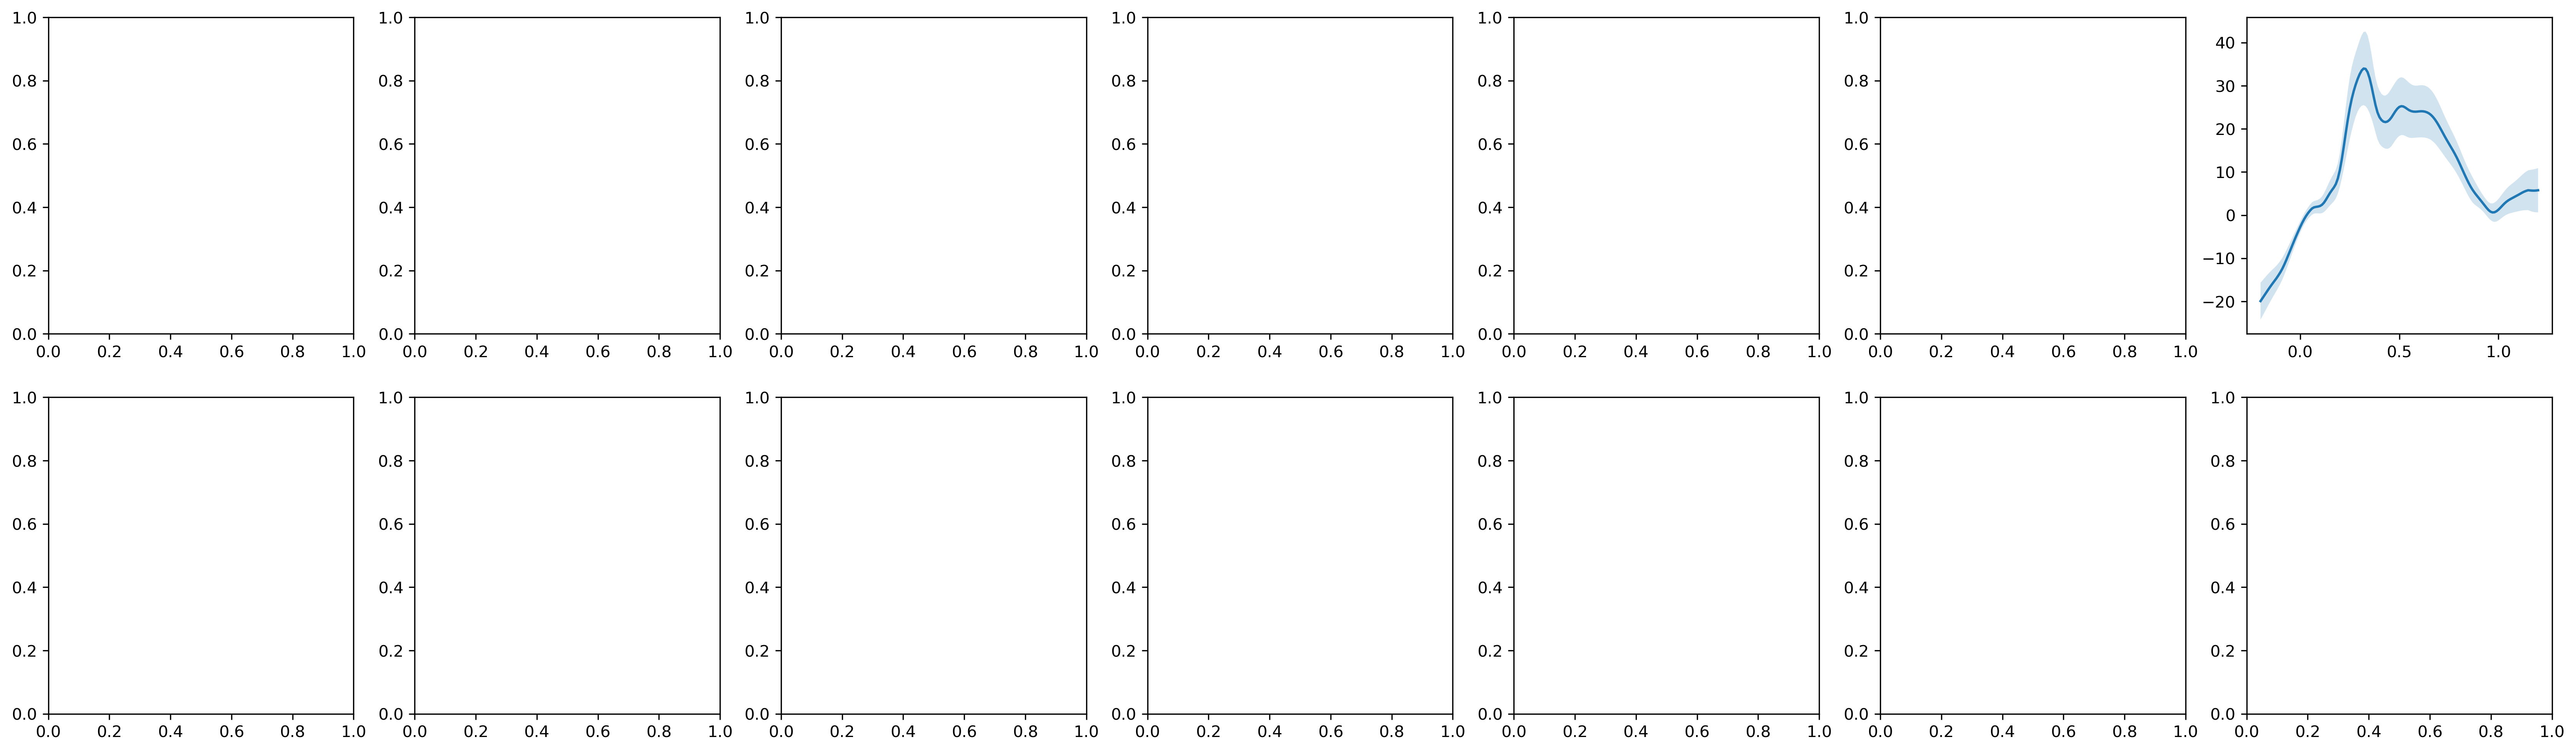

In [5]:
fig, axes = plt.subplots(2, len(shot_times)+1, figsize=((len(shot_times)+1) * 4, 8), dpi=300)

stc_mean = stc.data.mean(0)
stc_var = stc.data.std(0)
ax = axes[0][-1]
ax.plot(stc.times, stc_mean)
ax.fill_between(stc.times, stc_mean - stc_var, stc_mean + stc_var, alpha=0.2)

stc.subject = 'fsaverage'

for j, time in enumerate(shot_times):
    brain = stc.plot(subjects_dir=FS_subjects_dir, hemi='both', clim=clim,
                     initial_time=time, background='w', foreground='k',
                     colorbar=False, time_label='', time_viewer=False)

    im = []
    brain.show_view('ventral')
    im.append(brain.screenshot())
    
    if time == shot_times[-1]:
        brain.close()
        brain = stc.plot(subjects_dir=FS_subjects_dir, hemi='both', clim=clim,
                         initial_time=time, background='w', foreground='k',
                         colorbar=True, time_label='', time_viewer=False)
        
    brain.show_view('dorsal')
    im.append(brain.screenshot())
    brain.close()

    for i in range(2):
        ax = axes[i][j]
        ax.imshow(im[i])
        ax.axis('off')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title('{} seconds'.format(time))
        
fig.savefig('{}.png'.format('mean'))